In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

| Experiment ID       | Description       | 
|-----------------|----------------|
| f36e2c39-34cb-4b03-a2f9-68cb33bdbebe| IID Balanced FedAvg ResNet| 
| 8b1d3a21-7e63-40e7-be21-16d69b0b0aac| IID Balanced FedAdam ResNet| 
| 735bb18d-fb33-4be3-adaf-78289b69319d| IID Imbalanced FedAvg ResNet| 
| df3a0e29-0fc7-4cd5-838f-326822e098fc| IID Imbalanced FedAdam ResNet|  
| d9ae0c7d-e2bb-4ee4-94e2-4870ae5eb80a| Non-IID Balanced FedAvg ResNet| 
| c986f32b-b752-45d2-ae81-9ba9b48289f7| Non-IID Balanced FedAdam ResNet| 
| 01960312-13a0-4f41-9e14-31508c3c02ba| Non-IID Imbalanced FedAvg ResNet| 
| b4e8e959-5146-4418-9a89-ffe9def5dcbd| Non-IID Imbalanced FedAdam ResNet| 


In [2]:
def get_json(file_path):
    with open(file_path) as f:
        data = json.load(f)
    return data

In [3]:
def get_experiment_data_2clients(file_path):
    import numpy as np
    import pandas as pd
    training_data0 = get_json(file_path+'/0/training.json')
    training_data1 = get_json(file_path+'/1/training.json')
    validate_data0 = get_json(file_path+'/0/validate.json')
    validate_data1 = get_json(file_path+'/1/validate.json')
    training_data0 = pd.DataFrame(training_data0)
    training_data1 = pd.DataFrame(training_data1)
    validate_data0 = pd.DataFrame(validate_data0)
    validate_data1 = pd.DataFrame(validate_data1)
    return training_data0, training_data1, validate_data0, validate_data1

In [50]:
ex1_training_data0, ex1_training_data1, ex1_validate_data0, ex1_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/f36e2c39-34cb-4b03-a2f9-68cb33bdbebe")
ex2_training_data0, ex2_training_data1, ex2_validate_data0, ex2_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/8b1d3a21-7e63-40e7-be21-16d69b0b0aac")


ex3_training_data0, ex3_training_data1, ex3_validate_data0, ex3_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/735bb18d-fb33-4be3-adaf-78289b69319d")
ex4_training_data0, ex4_training_data1, ex4_validate_data0, ex4_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/df3a0e29-0fc7-4cd5-838f-326822e098fc")

ex5_training_data0, ex5_training_data1, ex5_validate_data0, ex5_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/d9ae0c7d-e2bb-4ee4-94e2-4870ae5eb80a")
ex6_training_data0, ex6_training_data1, ex6_validate_data0, ex6_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/c986f32b-b752-45d2-ae81-9ba9b48289f7")


ex7_training_data0, ex7_training_data1, ex7_validate_data0, ex7_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/01960312-13a0-4f41-9e14-31508c3c02ba")
ex8_training_data0, ex8_training_data1, ex8_validate_data0, ex8_validate_data1 = get_experiment_data_2clients("/Users/max/Fedn_Project/CIFAR10_Experiments/2clients/ResNet/b4e8e959-5146-4418-9a89-ffe9def5dcbd")

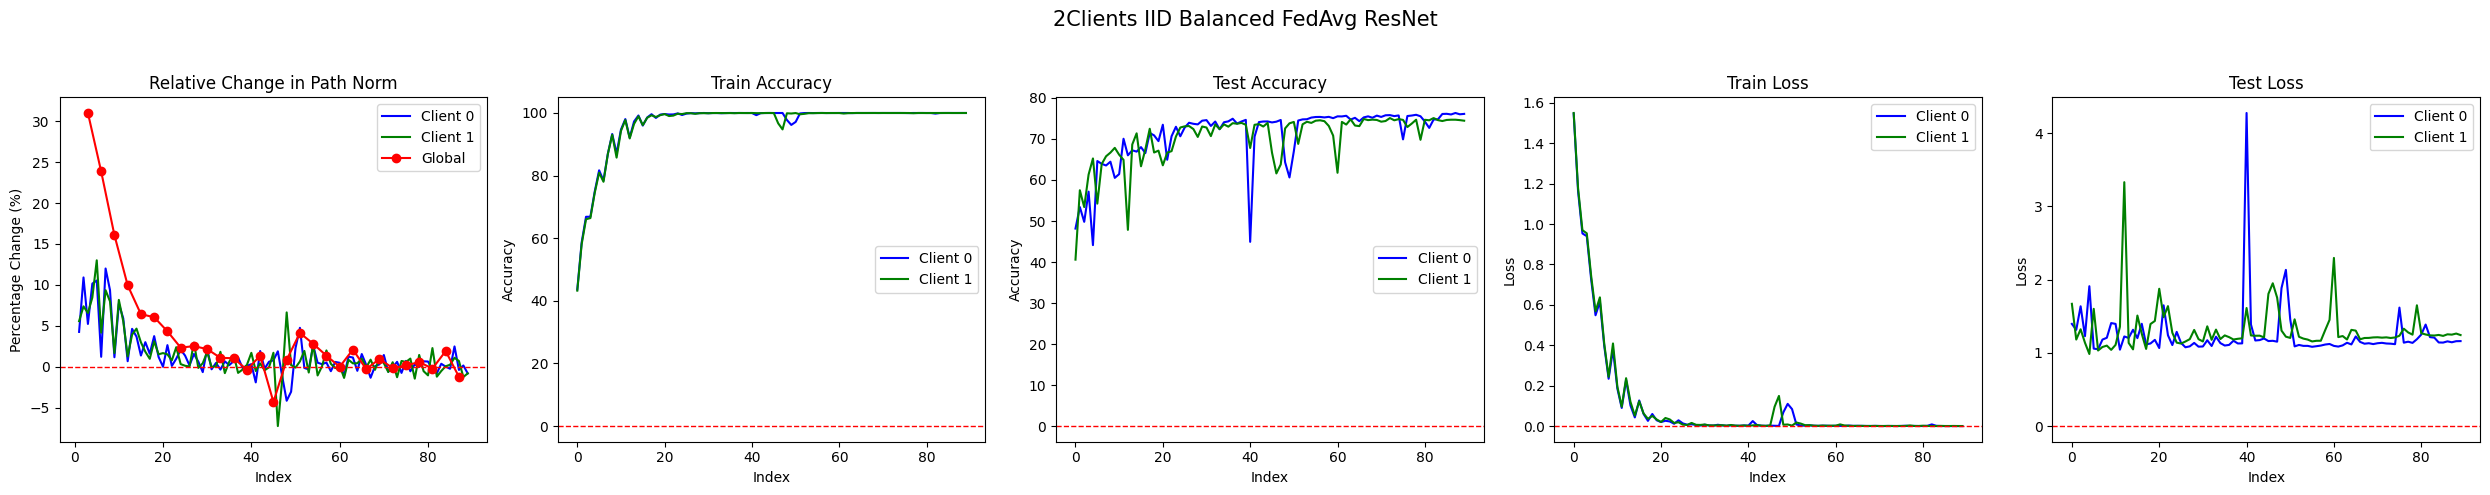

In [51]:
client0_path_norm = ex1_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex1_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex1_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex1_training_data0['train_loss']
client1_train_loss = ex1_training_data1['train_loss']
client0_train_acc =  ex1_training_data0['train_accuracy']
client1_train_acc = ex1_training_data1['train_accuracy']
client0_test_loss = ex1_training_data0['test_loss']
client1_test_loss = ex1_training_data1['test_loss']
client0_test_acc = ex1_training_data0['test_accuracy']
client1_test_acc = ex1_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients IID Balanced FedAvg ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_IID_Balanced_FedAvg_ResNet.pdf")
plt.show()


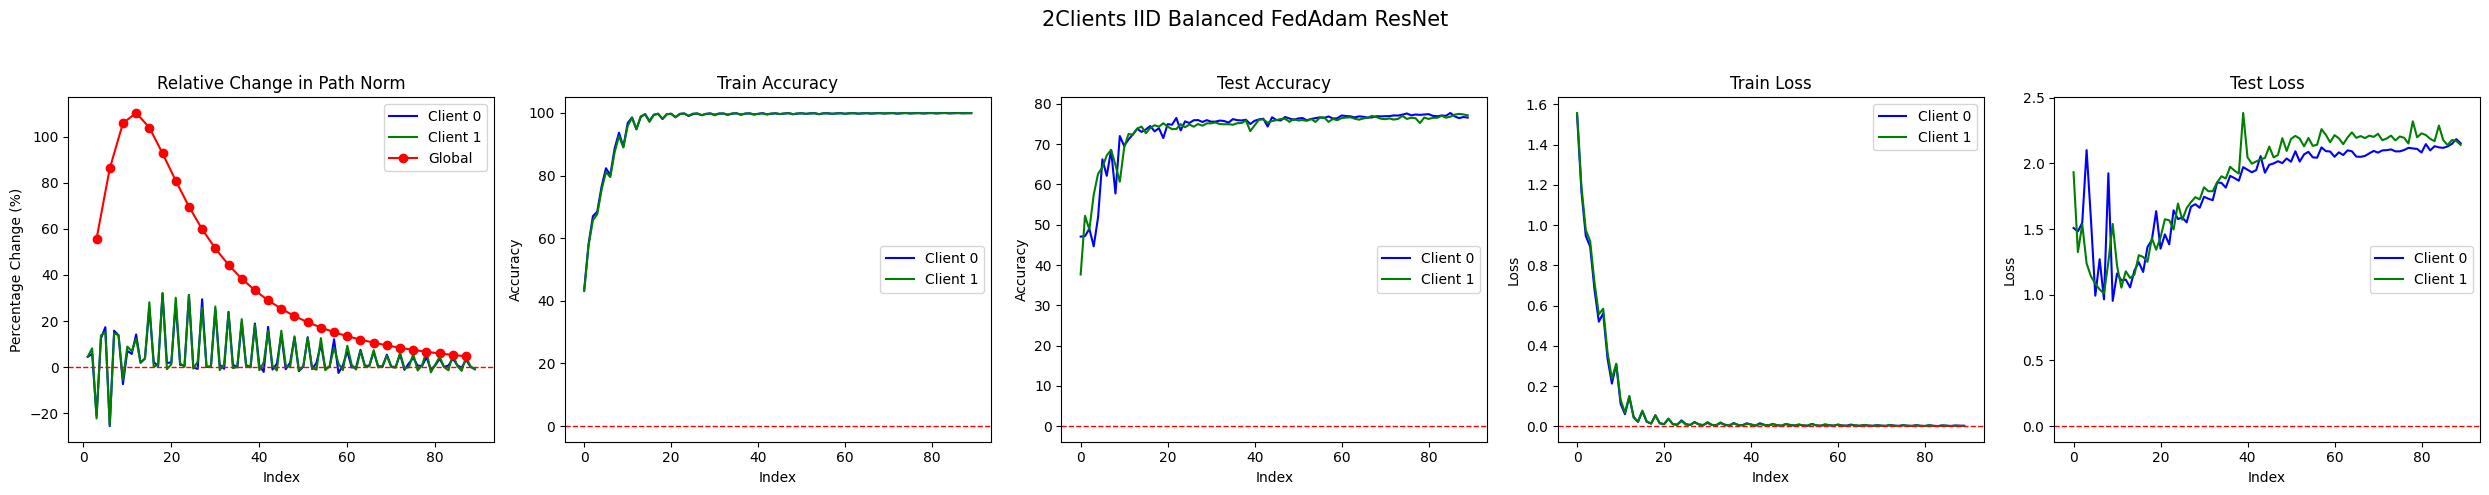

In [52]:
client0_path_norm = ex2_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex2_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex2_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex2_training_data0['train_loss']
client1_train_loss = ex2_training_data1['train_loss']
client0_train_acc =  ex2_training_data0['train_accuracy']
client1_train_acc = ex2_training_data1['train_accuracy']
client0_test_loss = ex2_training_data0['test_loss']
client1_test_loss = ex2_training_data1['test_loss']
client0_test_acc = ex2_training_data0['test_accuracy']
client1_test_acc = ex2_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients IID Balanced FedAdam ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_IID_Balanced_FedAdam_ResNet.pdf")
plt.show()


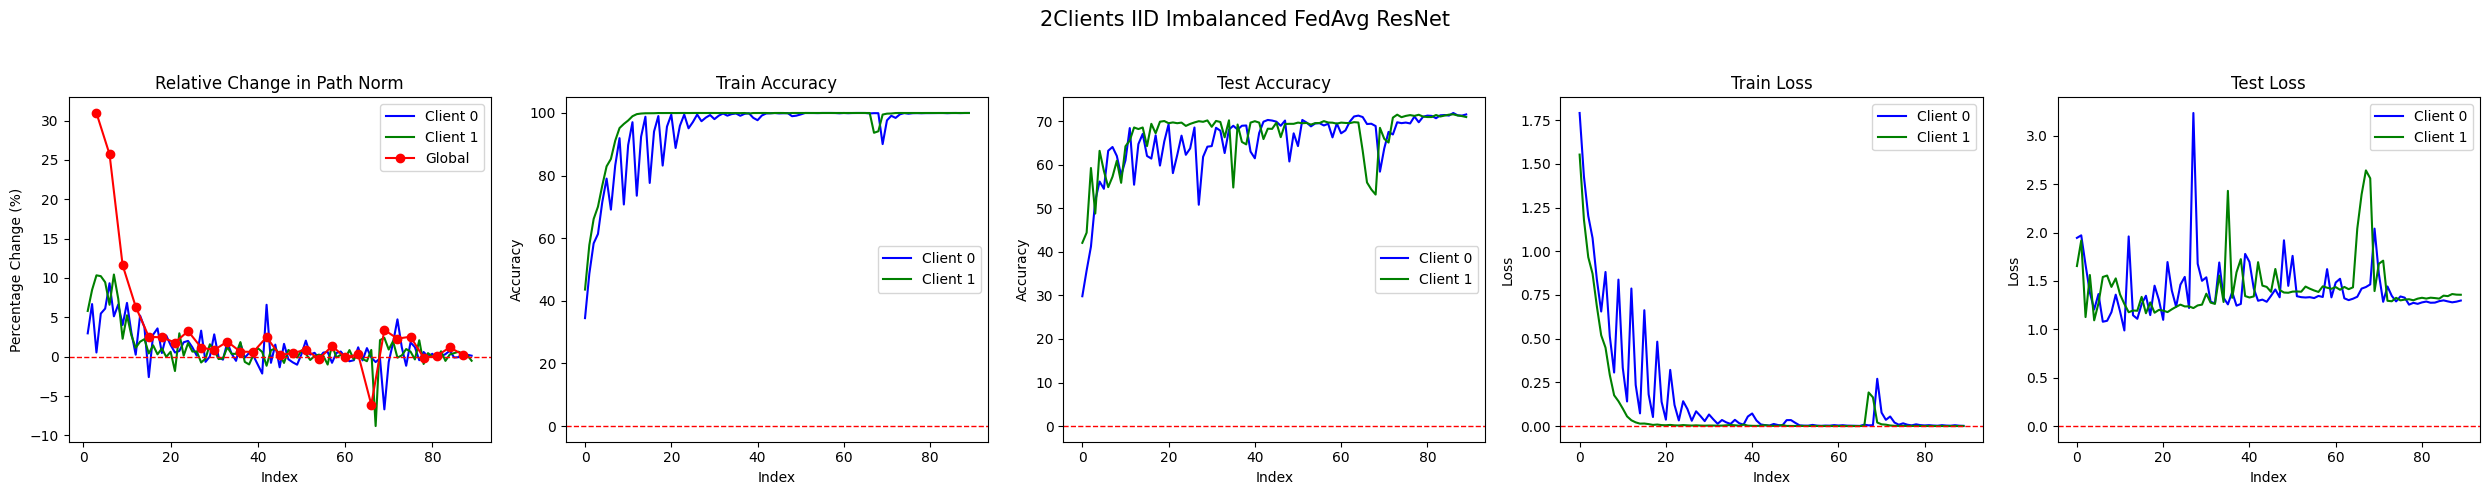

In [53]:
client0_path_norm = ex3_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex3_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex3_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex3_training_data0['train_loss']
client1_train_loss = ex3_training_data1['train_loss']
client0_train_acc =  ex3_training_data0['train_accuracy']
client1_train_acc = ex3_training_data1['train_accuracy']
client0_test_loss = ex3_training_data0['test_loss']
client1_test_loss = ex3_training_data1['test_loss']
client0_test_acc = ex3_training_data0['test_accuracy']
client1_test_acc = ex3_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients IID Imbalanced FedAvg ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_IID_Imbalanced_FedAvg_ResNet.pdf")
plt.show()


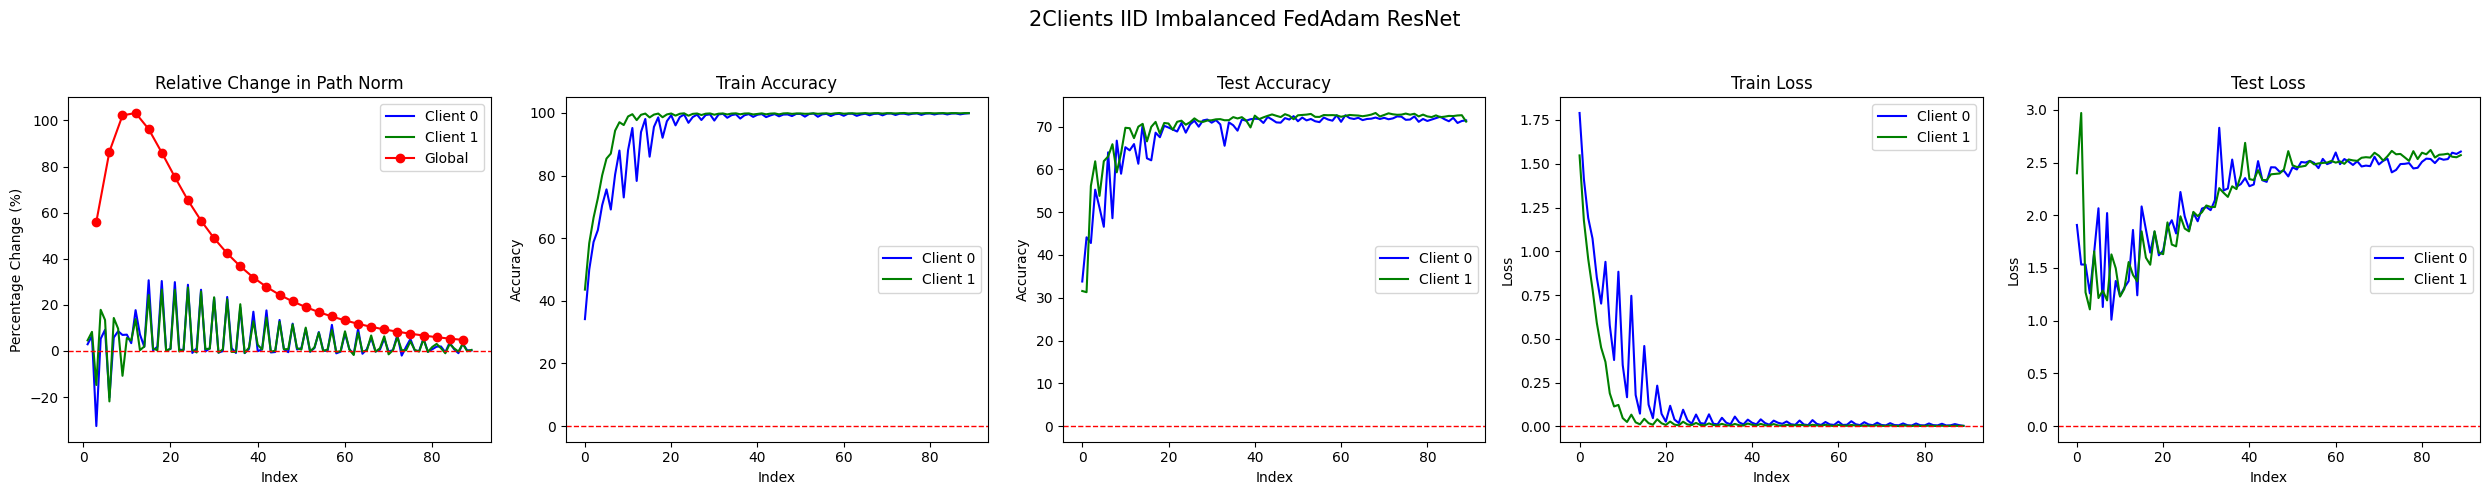

In [54]:
client0_path_norm = ex4_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex4_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex4_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex4_training_data0['train_loss']
client1_train_loss = ex4_training_data1['train_loss']
client0_train_acc =  ex4_training_data0['train_accuracy']
client1_train_acc = ex4_training_data1['train_accuracy']
client0_test_loss = ex4_training_data0['test_loss']
client1_test_loss = ex4_training_data1['test_loss']
client0_test_acc = ex4_training_data0['test_accuracy']
client1_test_acc = ex4_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients IID Imbalanced FedAdam ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_IID_Imbalanced_FedAdam_ResNet.pdf")
plt.show()


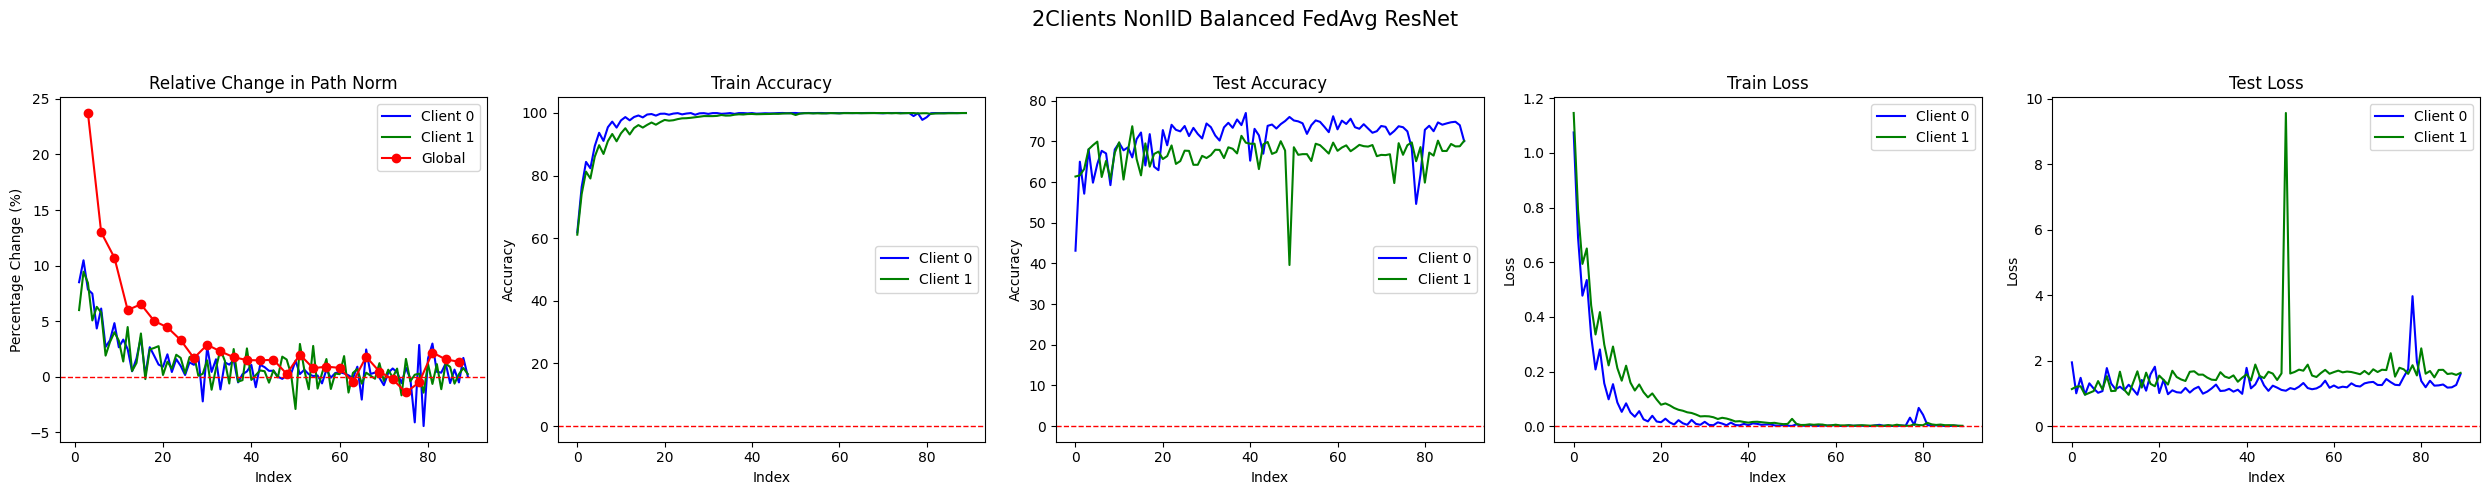

In [55]:
client0_path_norm = ex5_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex5_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex5_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex5_training_data0['train_loss']
client1_train_loss = ex5_training_data1['train_loss']
client0_train_acc =  ex5_training_data0['train_accuracy']
client1_train_acc = ex5_training_data1['train_accuracy']
client0_test_loss = ex5_training_data0['test_loss']
client1_test_loss = ex5_training_data1['test_loss']
client0_test_acc = ex5_training_data0['test_accuracy']
client1_test_acc = ex5_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients NonIID Balanced FedAvg ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_NonIID_Balanced_FedAvg_ResNet.pdf")
plt.show()


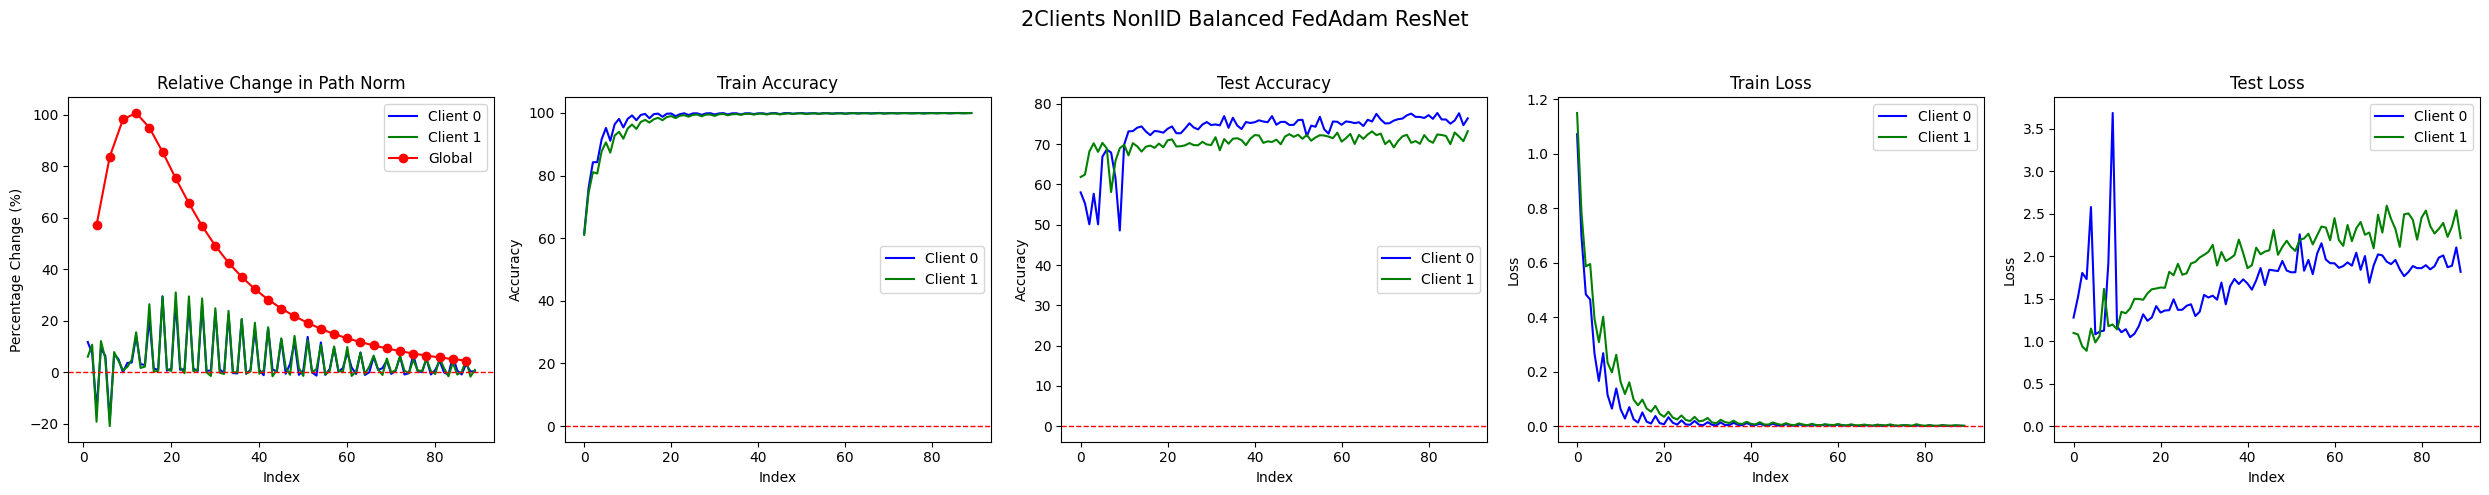

In [56]:
client0_path_norm = ex6_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex6_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex6_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex6_training_data0['train_loss']
client1_train_loss = ex6_training_data1['train_loss']
client0_train_acc =  ex6_training_data0['train_accuracy']
client1_train_acc = ex6_training_data1['train_accuracy']
client0_test_loss = ex6_training_data0['test_loss']
client1_test_loss = ex6_training_data1['test_loss']
client0_test_acc = ex6_training_data0['test_accuracy']
client1_test_acc = ex6_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients NonIID Balanced FedAdam ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_NonIID_Balanced_FedAdam_ResNet.pdf")
plt.show()


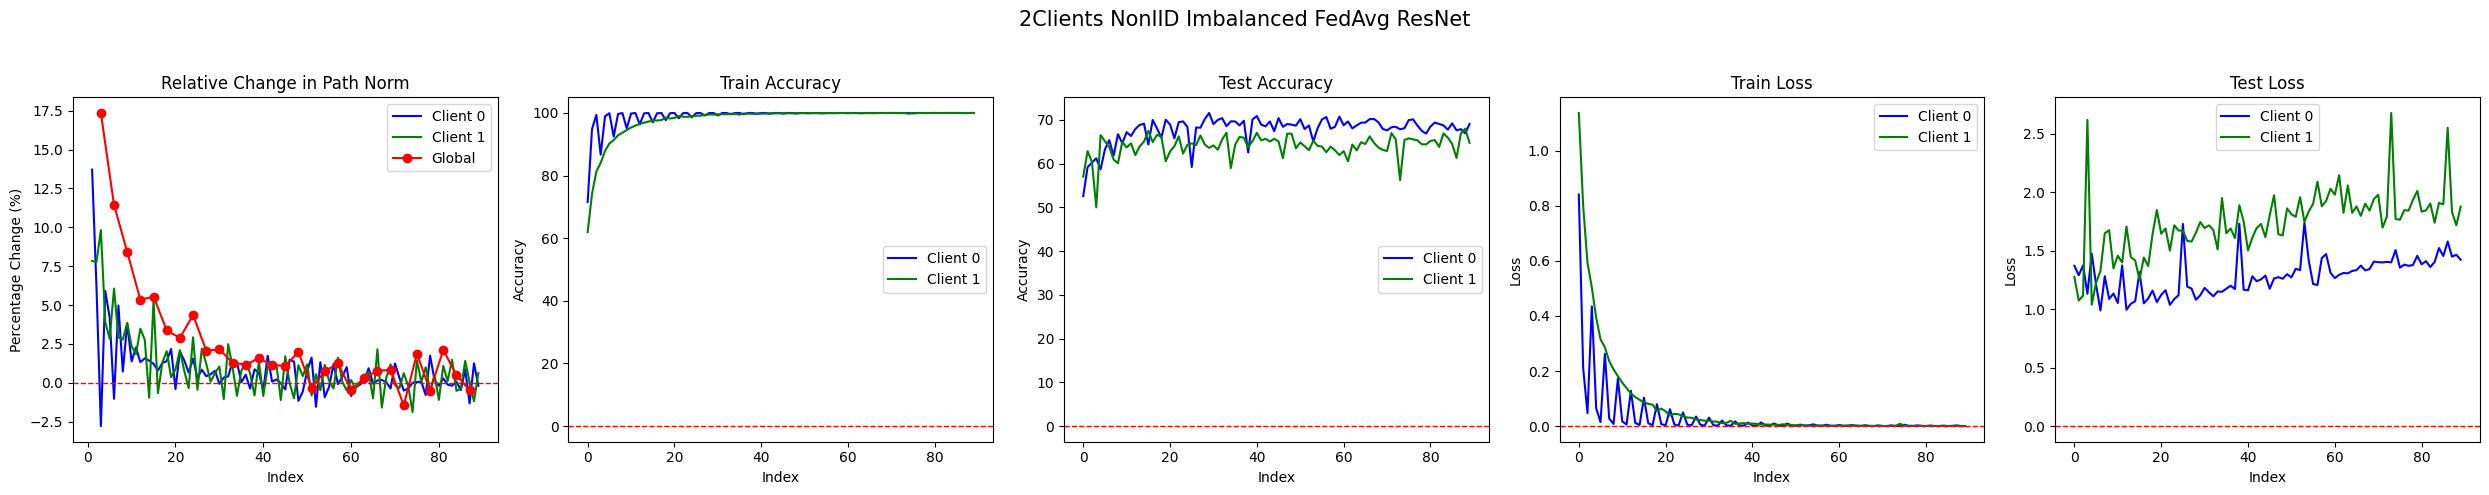

In [57]:
client0_path_norm = ex7_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex7_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex7_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex7_training_data0['train_loss']
client1_train_loss = ex7_training_data1['train_loss']
client0_train_acc =  ex7_training_data0['train_accuracy']
client1_train_acc = ex7_training_data1['train_accuracy']
client0_test_loss = ex7_training_data0['test_loss']
client1_test_loss = ex7_training_data1['test_loss']
client0_test_acc = ex7_training_data0['test_accuracy']
client1_test_acc = ex7_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients NonIID Imbalanced FedAvg ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_NonIID_Imbalanced_FedAvg_ResNet.pdf")
plt.show()


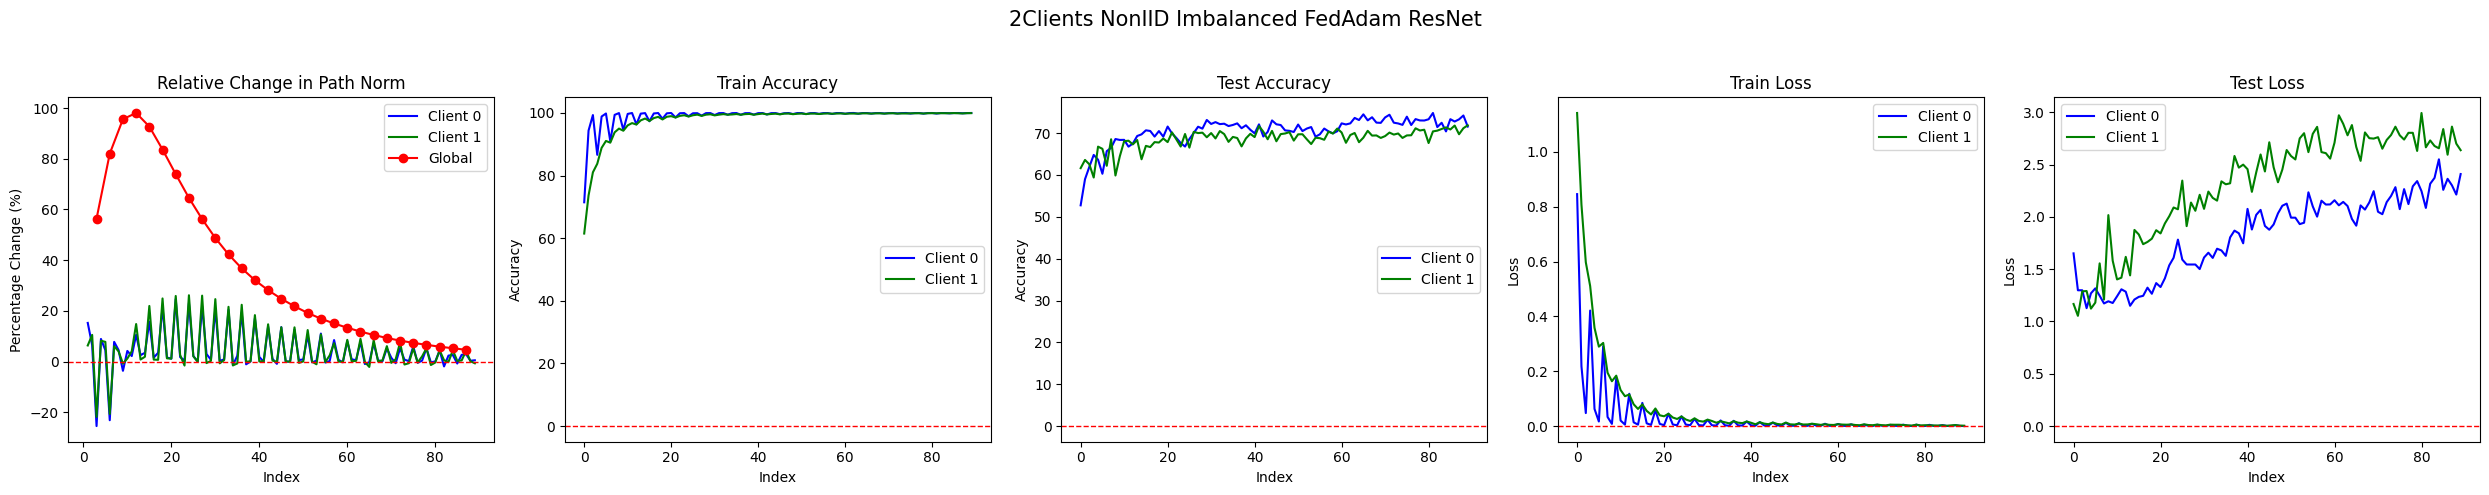

In [58]:
client0_path_norm = ex8_training_data0['path_norm']
relative_change_client0_path_norm = client0_path_norm.pct_change() * 100
client1_path_norm = ex8_training_data1['path_norm']
relative_change_client1_path_norm = client1_path_norm.pct_change() * 100
global_path_norm = ex8_validate_data0['path_norm']
relative_change_global_path_norm = global_path_norm.pct_change() * 100
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
client0_train_loss = ex8_training_data0['train_loss']
client1_train_loss = ex8_training_data1['train_loss']
client0_train_acc =  ex8_training_data0['train_accuracy']
client1_train_acc = ex8_training_data1['train_accuracy']
client0_test_loss = ex8_training_data0['test_loss']
client1_test_loss = ex8_training_data1['test_loss']
client0_test_acc = ex8_training_data0['test_accuracy']
client1_test_acc = ex8_training_data1['test_accuracy']
import matplotlib.pyplot as plt

# 创建一个 1x5 的布局
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# 第一张图：Relative Change in Path Norm
axes[0].plot(relative_change_client0_path_norm, label='Client 0', color='blue')
axes[0].plot(relative_change_client1_path_norm, label='Client 1', color='green')
sampled_global_index = range(0, len(relative_change_client1_path_norm), 3)
axes[0].plot(sampled_global_index, relative_change_global_path_norm, label='Global', color='red', marker='o')
axes[0].set_title("Relative Change in Path Norm")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Percentage Change (%)")
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].legend()

# 第二张图：Train Loss
axes[3].plot(client0_train_loss, label='Client 0', color='blue')
axes[3].plot(client1_train_loss, label='Client 1', color='green')
axes[3].set_title("Train Loss")
axes[3].set_xlabel("Index")
axes[3].set_ylabel("Loss")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)
axes[3].legend()


# 第五张图：Test Loss
axes[4].plot(client0_test_loss, label='Client 0', color='blue')
axes[4].plot(client1_test_loss, label='Client 1', color='green')
axes[4].set_title("Test Loss")
axes[4].set_xlabel("Index")
axes[4].set_ylabel("Loss")
axes[4].axhline(0, color='red', linestyle='--', linewidth=1)
axes[4].legend()

# 第三张图：Train Accuracy
axes[1].plot(client0_train_acc, label='Client 0', color='blue')
axes[1].plot(client1_train_acc, label='Client 1', color='green')
axes[1].set_title("Train Accuracy")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Accuracy")
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].legend()

# 第四张图：Test Accuracy
axes[2].plot(client0_test_acc, label='Client 0', color='blue')
axes[2].plot(client1_test_acc, label='Client 1', color='green')
axes[2].set_title("Test Accuracy")
axes[2].set_xlabel("Index")
axes[2].set_ylabel("Accuracy")
axes[2].axhline(0, color='red', linestyle='--', linewidth=1)
axes[2].legend()




fig.suptitle("2Clients NonIID Imbalanced FedAdam ResNet", fontsize=15)
# 调整子图间距
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 留出空间给标题
plt.savefig("2Clients_NonIID_Imbalanced_FedAdam_ResNet.pdf")
plt.show()
